In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.karate_club_graph()

A = nx.to_numpy_array(G)
degrees = A.sum(axis=1)
P = A / degrees[:, None]

# 9.2 & 9.3

## numerical

In [3]:
eigvals, eigvecs = np.linalg.eig(P.T)
# eigvector corresponding to eigenvalue 1
idx = np.argmin(np.abs(eigvals - 1))
pi_eig = np.real(eigvecs[:, idx])
# normalize to make it a probability distribution
pi_eig /= pi_eig.sum()

print("Stationary distribution (numerical):")
print(pi_eig)

Stationary distribution (numerical):
[0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351 0.01731602 0.00649351
 0.00865801 0.03679654 0.01082251 0.01515152 0.01298701 0.00649351
 0.00649351 0.01082251 0.00865801 0.00865801 0.01082251 0.04545455
 0.01515152 0.03030303 0.01298701 0.02813853 0.01298701 0.02813853
 0.02380952 0.04545455 0.08225108 0.1038961 ]


## dynamic

In [4]:
pi = np.ones(len(G)) / len(G)
for _ in range(1000):
    pi = pi @ P
pi /= pi.sum()

print("Stationary distribution (iterative):")
print(pi)

Stationary distribution (iterative):
[0.09090909 0.06277056 0.07142857 0.03896104 0.01731602 0.03030303
 0.02813853 0.02813853 0.03679654 0.00649351 0.01731602 0.00649351
 0.00865801 0.03679654 0.01082251 0.01515152 0.01298701 0.00649351
 0.00649351 0.01082251 0.00865801 0.00865801 0.01082251 0.04545455
 0.01515152 0.03030303 0.01298701 0.02813853 0.01298701 0.02813853
 0.02380952 0.04545455 0.08225108 0.1038961 ]


# 9.5

PageRank vector:
Node 0: 0.0885
Node 1: 0.0574
Node 2: 0.0628
Node 3: 0.0372
Node 4: 0.0205
Node 5: 0.0338
Node 6: 0.0315
Node 7: 0.0265
Node 8: 0.0334
Node 9: 0.0095
Node 10: 0.0207
Node 11: 0.0098
Node 12: 0.0115
Node 13: 0.0335
Node 14: 0.0129
Node 15: 0.0164
Node 16: 0.0168
Node 17: 0.0097
Node 18: 0.0095
Node 19: 0.0131
Node 20: 0.0112
Node 21: 0.0114
Node 22: 0.0130
Node 23: 0.0411
Node 24: 0.0166
Node 25: 0.0287
Node 26: 0.0152
Node 27: 0.0272
Node 28: 0.0145
Node 29: 0.0283
Node 30: 0.0230
Node 31: 0.0420
Node 32: 0.0759
Node 33: 0.0970


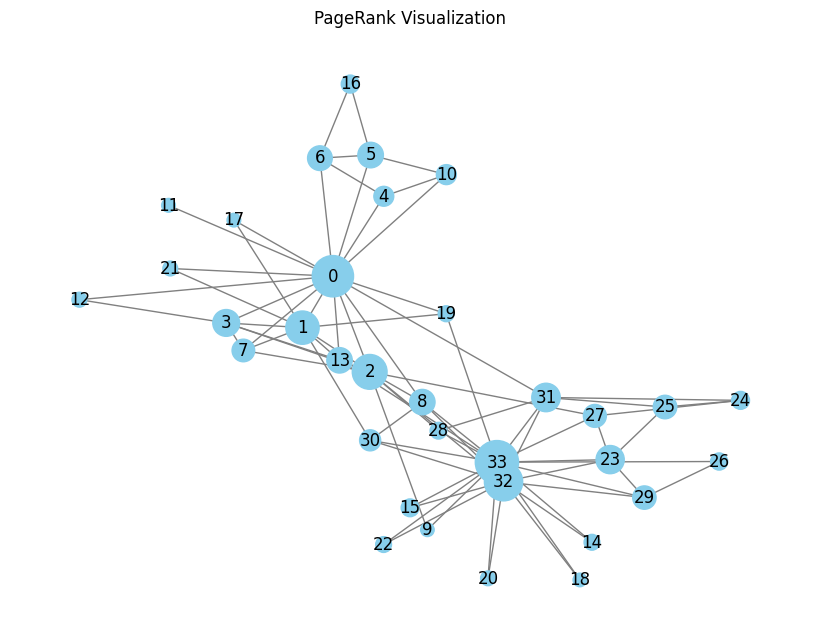

In [11]:
alpha = 0.85
N = A.shape[0]
v = np.ones(N) / N  # uniform teleportation

# Initialize PR
PR = np.ones(N) / N
epsilon = 1e-8
delta = 1.0

# Power iteration
while delta > epsilon:
    PR_new = alpha * PR @ P + (1 - alpha) * v
    delta = np.linalg.norm(PR_new - PR, 1)
    PR = PR_new

print("PageRank vector:")
for i, pr in enumerate(PR):
    print(f"Node {i}: {pr:.4f}")

G = nx.from_numpy_array(A)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
node_sizes = PR * 10000
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray')
plt.title("PageRank Visualization")
plt.show()